In [6]:
!pip install matplotlib
#!pip install seaborn

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Creating sample regression data

    Introdction to Regression with NN in tensorflow

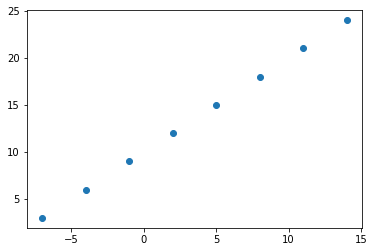

In [8]:
# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulaize it
plt.scatter(x,y)

In [10]:
# Create a demo tensor for out housing privce prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [12]:
x[0], y[0]

(-7.0, 3.0)

In [13]:
x[1], y[1]

(-4.0, 6.0)

In [14]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

# looks like input and output shape have no shape

((), ())

In [20]:
# Turn out numpy arrays into tensors with float32
x = tf.cast(tf.constant(x), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# making lists
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# adding denses
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Complie the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

# 3. Fit the model
#model.fit(x, y, epochs = 5)
# tf 2.7.0 이후부턴 코드 바뀜
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 133ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


2022-08-15 00:31:59.273557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
# check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [31]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

# epochs수가 너무 적어서 예측이 잘 안됨.

1/1 [==============================] - 0s 23ms/step


2022-08-15 00:32:01.594514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[12.716021]], dtype=float32)

# Steps in improving a model with tf